# Overturning

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt

In [3]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [4]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-_1x88fad', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-ioht3ybd', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-kb_qk2s1', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-qt7u7gdb', purging


Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34887,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:43519,Total threads: 4
Dashboard: http://127.0.0.1:32801/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:38641,


In [5]:
vmo = cc.querying.getvar(expt='panant-v2', variable='vmo', session=session, chunks={'yq':60},decode_times=False)
vmo_hycom1 = cc.querying.getvar(expt='panant-hycom1', variable='vmo', session=session, chunks={'yq':60},decode_times=False)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


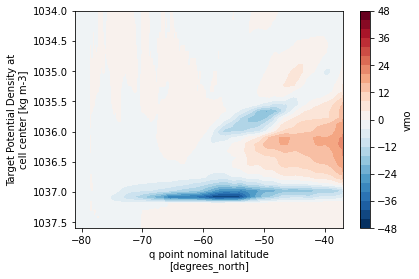

In [6]:
vmosum_hycom1_year1 = vmo_hycom1.isel(time=slice(0,11)).mean('time').sum('xh').load()/1e9
vmosum_hycom1_year1.cumsum('rho2_l').plot.contourf(levels=30)
plt.ylim([1034,1037.6])
plt.gca().invert_yaxis()

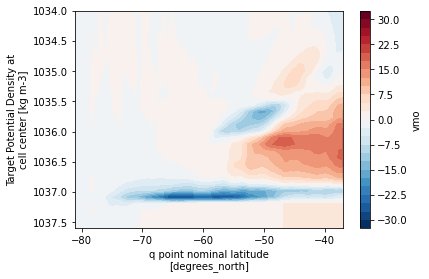

In [7]:
vmosum_year1 = vmo.isel(time=slice(0,11)).mean('time').sum('xh').load()/1e9
vmosum_year1.cumsum('rho2_l').plot.contourf(levels=30)
plt.ylim([1034,1037.6])
plt.gca().invert_yaxis()

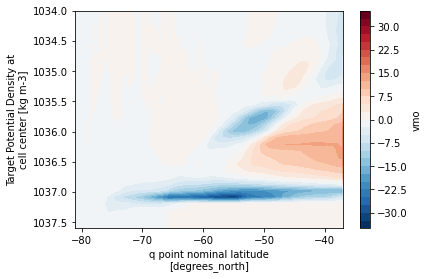

In [8]:
vmosum_last_year = vmo.isel(time=slice(-12,)).mean('time').sum('xh').load()/1e9
vmosum_last_year.cumsum('rho2_l').plot.contourf(levels=30)
plt.ylim([1034,1037.6])
plt.gca().invert_yaxis()

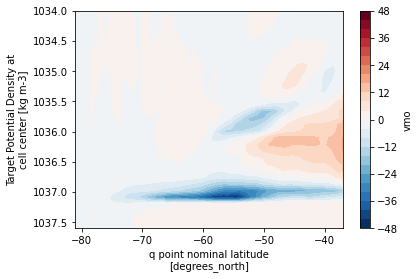

In [14]:
vmosum_hycom1_last_year = vmo_hycom1.isel(time=slice(-12,)).mean('time').sum('xh').load()/1e9
vmosum_hycom1_last_year.cumsum('rho2_l').plot.contourf(levels=30)
plt.ylim([1034,1037.6])
plt.gca().invert_yaxis()

In [9]:
vmo_ts65 = vmo.sel(yq=-65,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
vmo_ts55 = vmo.sel(yq=-55,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
vmo_ts45 = vmo.sel(yq=-45,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
vmo_hycom1_ts65 = vmo_hycom1.sel(yq=-65,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
vmo_hycom1_ts55 = vmo_hycom1.sel(yq=-55,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
vmo_hycom1_ts45 = vmo_hycom1.sel(yq=-45,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9

Text(0.5, 1.0, 'abyssal cell transport - 65S')

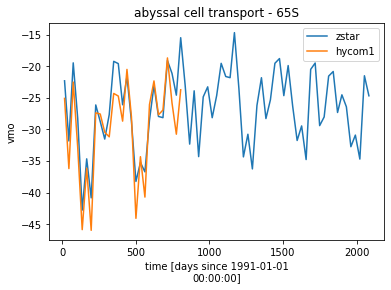

In [10]:
vmo_ts65.plot(label='zstar')
vmo_hycom1_ts65.plot(label='hycom1')
plt.legend()
plt.title('abyssal cell transport - 65S')

Text(0.5, 1.0, 'abyssal cell transport - 55S')

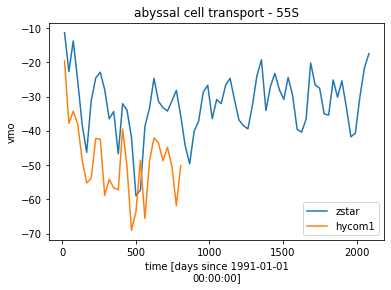

In [11]:
vmo_ts55.plot(label='zstar')
vmo_hycom1_ts55.plot(label='hycom1')
plt.legend()
plt.title('abyssal cell transport - 55S')

Text(0.5, 1.0, 'abyssal cell transport - 45S')

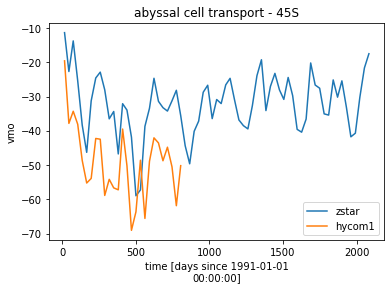

In [12]:
vmo_ts55.plot(label='zstar')
vmo_hycom1_ts55.plot(label='hycom1')
plt.legend()
plt.title('abyssal cell transport - 45S')

Text(0.5, 1.0, 'upper cell transport')

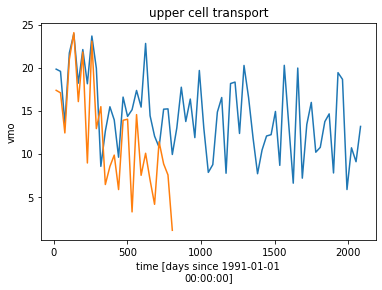

In [13]:
vmo_max_ts45 = vmo.sel(yq=-45,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
vmo_max_hycom1_ts45 = vmo_hycom1.sel(yq=-45,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
vmo_max_ts45.plot(label='zstar')
vmo_max_hycom1_ts45.plot(label='hycom1')
plt.title('upper cell transport')